In [1]:
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
shape_tuple = (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], *shape_tuple))
test_images = test_images.reshape((test_images.shape[0], *shape_tuple))
x_train, x_validate, y_train, y_validate = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=12345,
)

In [0]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

In [5]:
name = 'CNN_1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = 'CNN_2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='CNN_3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)


name='MLP_1_layer'
mlp_model_1 = Sequential([
    Flatten(),
    Dense(8192, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
], name=name)


name='MLP_2_layer'
mlp_model_2 = Sequential([
    Flatten(name='flatten'),
    Dense(2048, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
], name=name)


name='MLP_3_layer'
mlp_model_3 = Sequential([
    Flatten(name='flatten'),
    Dense(8192, activation='relu'),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
], name=name)

nn_models = [cnn_model_1, cnn_model_2, cnn_model_3, mlp_model_1, mlp_model_2, mlp_model_3]






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [6]:
# train the models and save results to a dict

history_dict = {}

for model in nn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/50





48000/48000 [==============================] - 4s 83us/step - loss: 0.8032 - acc: 0.7276 - val_loss: 0.5048 - val_acc: 0.8278
Epoch 2/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.4756 - acc: 0.8324 - val_loss: 0.4224 - val_acc: 0.8588
Epoch 3/50
48000/48000 [==============================] - 1s 20us/step - loss: 0.4247 - acc: 0.8512 - val_loss: 0.3806 - val_acc: 0.8710
Epoch 4/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.3870 - acc: 0.8654 - val_loss: 0.3636 - val_acc: 0.8791
Epoch 5/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.3730 - acc: 0.8678 - val_loss: 0.3449 - val_acc: 0.8828
Epoch 6/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.3503 - acc: 0.8769 - val_loss: 0.3302 - val_acc: 0.8865
Epoch 7/50
48000/48000 [

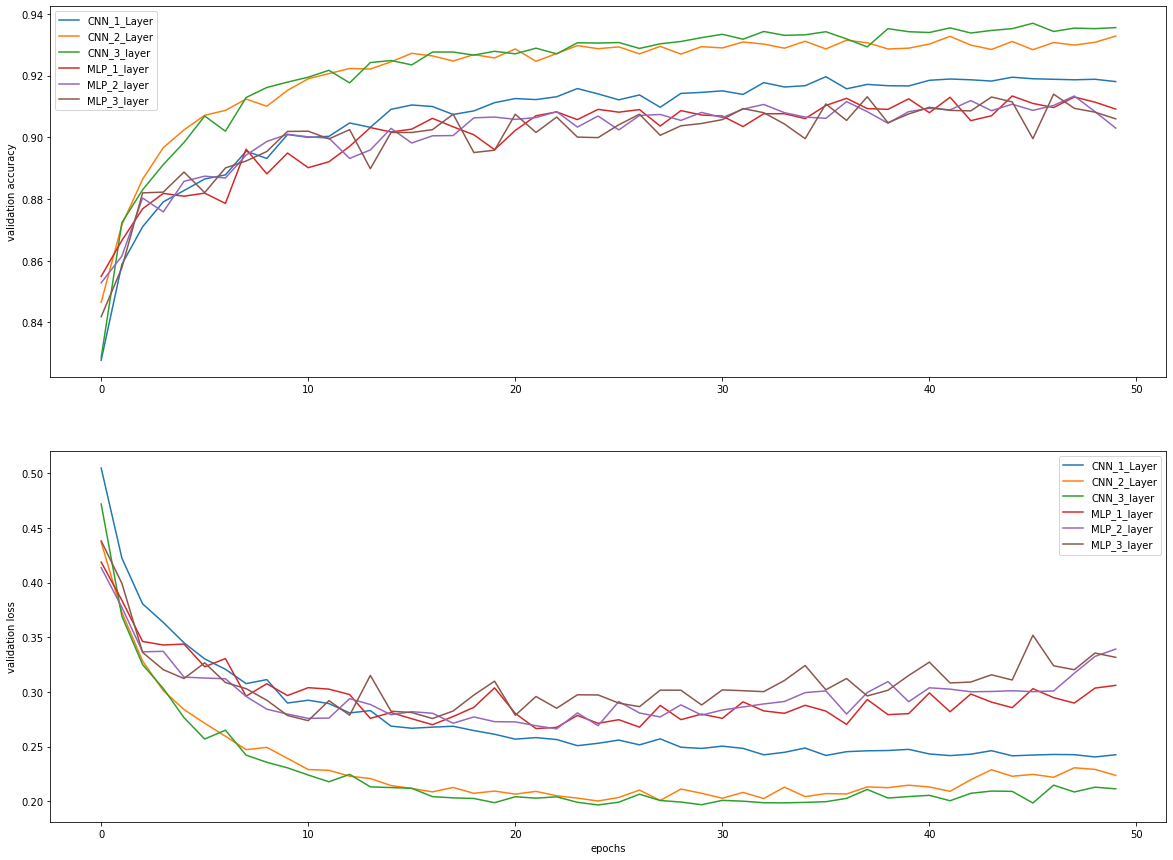

In [7]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 15))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [8]:
for model in nn_models:
    score = model.evaluate(test_images, test_labels, verbose=0)
    print(score)

[0.2639341290473938, 0.9108]
[0.2583287234723568, 0.9248]
[0.2507979316443205, 0.9263]
[0.3671808053135872, 0.8979]
[0.39769019341096284, 0.8877]
[0.3876154685378075, 0.891]
